In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [24]:
# Importing packages
import numpy as np
from numpy import matlib as mb
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
from scipy.spatial.distance import cdist 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.dropna(axis= 0, inplace= True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# **K-Means Clustering (from Scratch)**

Text(0, 0.5, 'Global Sales ($)')

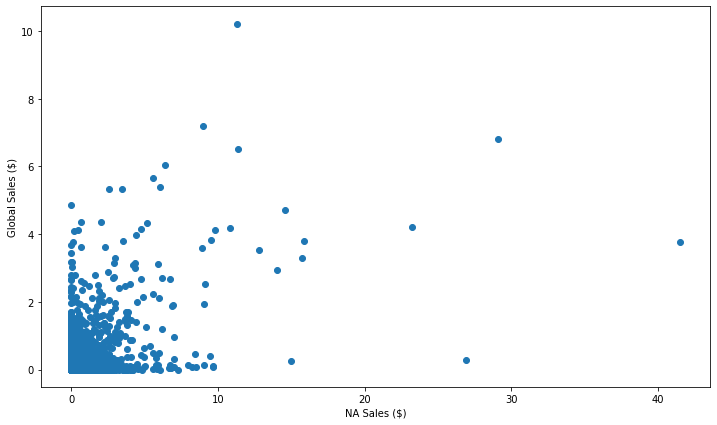

In [16]:
plt.subplots(figsize=(12,7))
plt.scatter(df.NA_Sales, df.JP_Sales)
plt.xlabel('NA Sales ($)')
plt.ylabel('JP Sales ($)')

In [18]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [21]:
df_cluster = df[["NA_Sales", "JP_Sales"]]
df_array = np.array(df_cluster)

In [25]:
k = 4
cluster_vars = []
centroids = [df_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, df_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, df_array))))
for i in range(20):
    centroids = calc_centroids(clusters, df_array)
    clusters = assign_clusters(centroids, df_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, df_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 1457
1 1048
2 975
3 925
4 876
5 843
6 817
7 792
8 782
9 776
10 772
11 770
12 769
13 768
14 768
15 768
16 767
17 767
18 767
19 767
20 767


Text(0, 0.5, 'Squared Deviations')

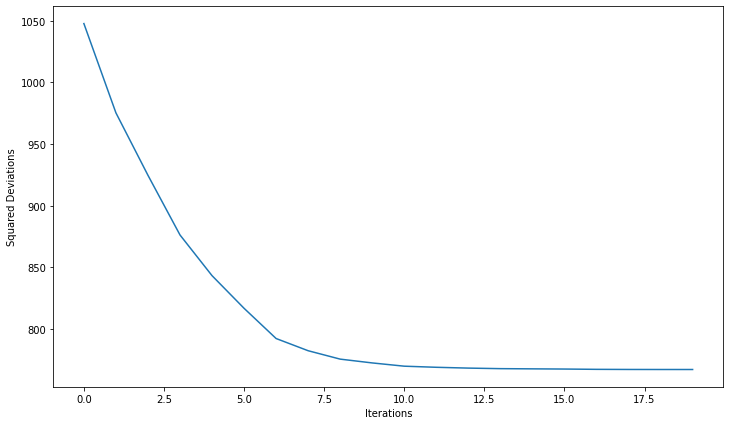

In [27]:
plt.subplots(figsize=(12,7))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Squared Deviations')

Text(0, 0.5, 'JP Sales ($)')

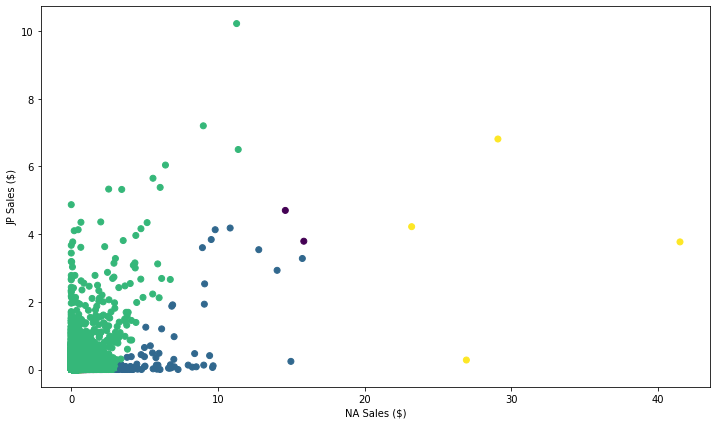

In [36]:
plt.subplots(figsize=(12,7))
plt.scatter(x=df_array[:,0], y=df_array[:,1], c=initial_clusters, cmap=plt.cm.viridis)
plt.xlabel('NA Sales ($)')
plt.ylabel('JP Sales ($)')

Text(0, 0.5, 'JP Sales ($)')

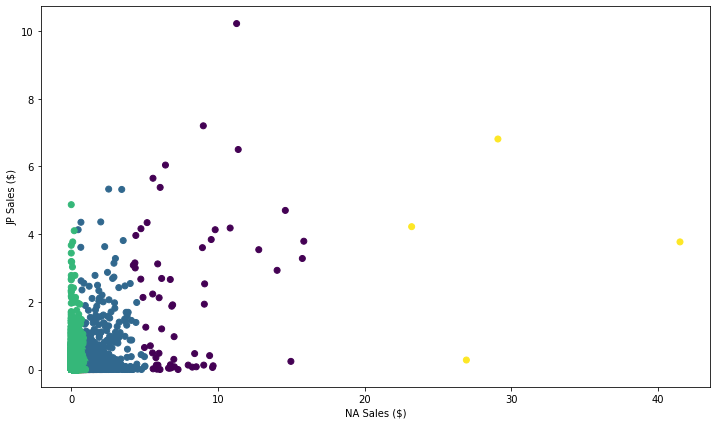

In [38]:
plt.subplots(figsize=(12,7))
plt.scatter(x= df_array[:,0], y= df_array[:,1], c= clusters, cmap= plt.cm.viridis)
plt.xlabel('NA Sales ($)')
plt.ylabel('JP Sales ($)')

# **Hierarchal Clustering**

In [55]:
from sklearn.preprocessing import normalize
df_hi = df[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
data_scaled = normalize(df_hi)
data_scaled = pd.DataFrame(data_scaled, columns=df_hi.columns)
data_scaled.head(10)

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.010262,0.425762,0.297797,0.038687,0.086815,0.849061
1,0.039772,0.578291,0.071193,0.135425,0.015312,0.800222
2,0.072033,0.380576,0.309263,0.091002,0.079477,0.860077
3,0.103494,0.407506,0.284866,0.084865,0.076585,0.853822
4,0.137591,0.310130,0.244636,0.281235,0.027518,0.863244
5,0.154244,0.596411,0.058099,0.108485,0.014910,0.777905
6,0.200825,0.326484,0.264802,0.186480,0.083199,0.860965
7,0.230523,0.404279,0.265101,0.084429,0.082124,0.836221
8,0.260895,0.422941,0.204658,0.136245,0.065514,0.829648
9,0.247888,0.667563,0.015617,0.006941,0.011651,0.701772


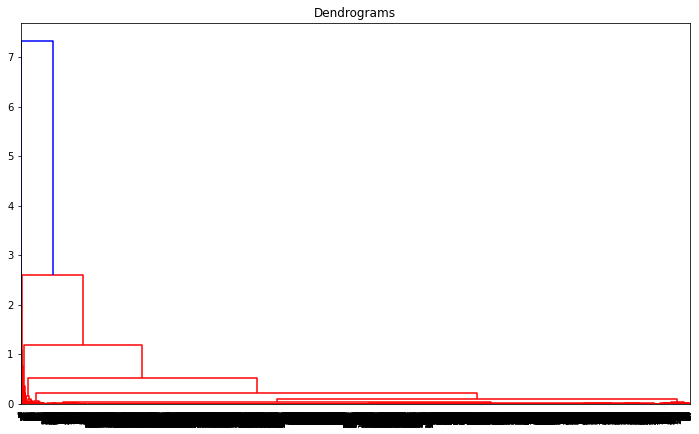

In [56]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [46]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, ..., 0, 0, 0])

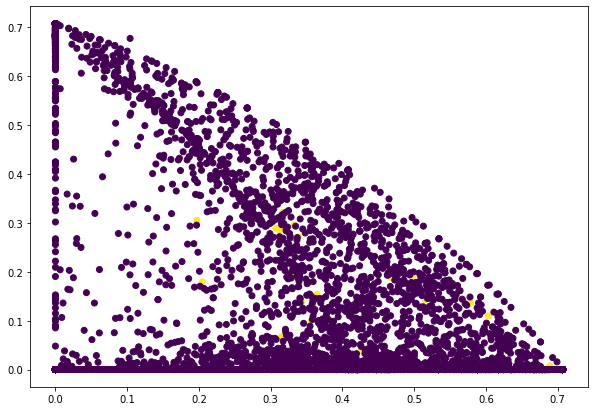

In [48]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['NA_Sales'], data_scaled['JP_Sales'], c=cluster.labels_) 

Hierarchal clustering did not turn out very well for the video game sales dataset.

# **Gaussian Mixture Model Clustering**

# **References**



1. https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25
2. https://www.analyticsvidhya.com/blog/2019/05beginners-guide-hierarchical-clustering/
